In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_data.csv')
df.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,...,3,3,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,4,...,3,1,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,...,3,4,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,2,...,3,4,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,...,3,4,0,0,0,3,0,0,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1423 non-null   int64  
 1   AgeGroup                  1423 non-null   object 
 2   Attrition                 1423 non-null   object 
 3   BusinessTravel            1423 non-null   object 
 4   DailyRate                 1423 non-null   int64  
 5   Department                1423 non-null   object 
 6   DistanceFromHome          1423 non-null   int64  
 7   Education                 1423 non-null   int64  
 8   EducationField            1423 non-null   object 
 9   EnvironmentSatisfaction   1423 non-null   int64  
 10  Gender                    1423 non-null   object 
 11  HourlyRate                1423 non-null   int64  
 12  JobInvolvement            1423 non-null   int64  
 13  JobLevel                  1423 non-null   int64  
 14  JobRole 

In [4]:
#Create list format
columns_data = df.columns.values.tolist()
columns_data

['Age',
 'AgeGroup',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'SalarySlab',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

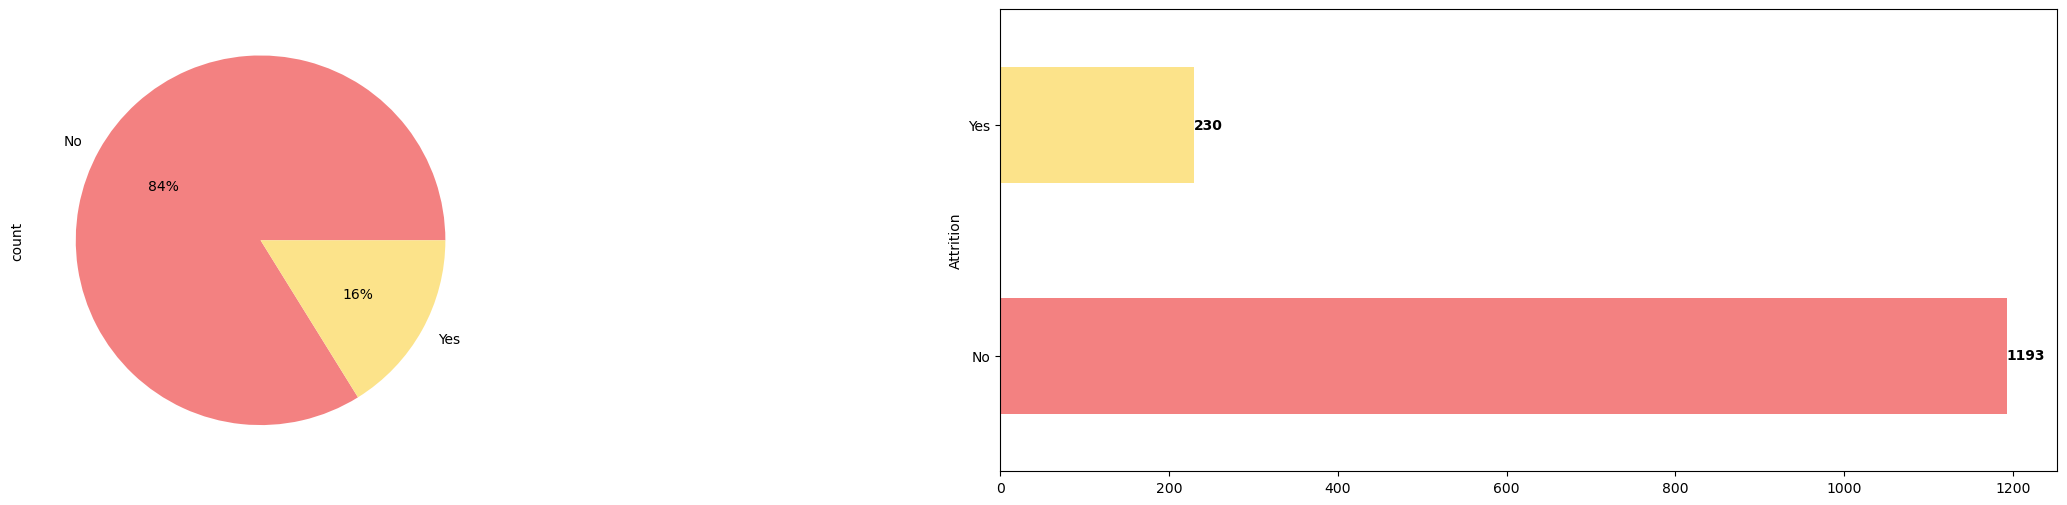

In [5]:
# Let's see how Target feature is distributed
plt.figure(figsize=(30,6))

# Pie chart
plt.subplot(121)
df.Attrition.value_counts().plot(kind='pie', autopct="%1.0f%%", colors=['#F38181','#FCE38A'])

# Bar chart
plt.subplot(122)
ax = df.Attrition.value_counts().plot(kind='barh', color=['#F38181','#FCE38A'])

for i, j in enumerate(df['Attrition'].value_counts().values):
    ax.text(j, i, str(j), color='black', va='center', fontweight='bold')

plt.show()

In [ ]:
def distributionGraphs(x):
    print("\033[1m\033[1;3mDistribution Based on "+str(x)+"\033[0m")
    print('Description : ',columns_data[(columns_data == 'current_data') & (columns_data == x)],'\n')

    #Create a normalized value count converted to percentage
    target_group = round(df.groupby('Attrition')[x].value_counts(normalize=True,sort=False)*100)

    #cnt = int((target_group.count()))
    cnt = int((target_group.count()/2))

    all_colr = ['#F38181','#FCE38A','#EAFFD0','#95E1D3','#EEEEEE','#00ADB5']
    colors = all_colr[:cnt]
    plt.figure(figsize=(30,6))

    plt.subplot(121)
    plt.title(str(x)+' Distribution grouped by Target')
    ax = target_group.plot(kind='bar',color=colors)

    # A method to print values in Bar
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2, str(bar.get_height()))

    plt.subplot(122)
    plt.title(str(x)+' distribution in Overall Records')
    (df[x].value_counts(normalize=True)*100).plot(kind='pie', autopct = "%1.0f%%", colors=colors)
    plt.ylabel(' ')

    plt.show()

    print("\033[1m\033[1;3mTable View\033[0m")
    print(target_group)
    print("\n\n")
    

In [7]:

###data type

# which columns are object
data_obj_cols = list(df.select_dtypes(include='object'))
print('data_obj_cols : ',len(data_obj_cols))

# the nunmeric type
data_numeric_cols = list(df.select_dtypes(include=['float64','int64']))
print('data_numeric_cols : ',len(data_numeric_cols))

data_obj_cols :  10
data_numeric_cols :  23


Distribution Based on AgeGroup
Description :  Age 



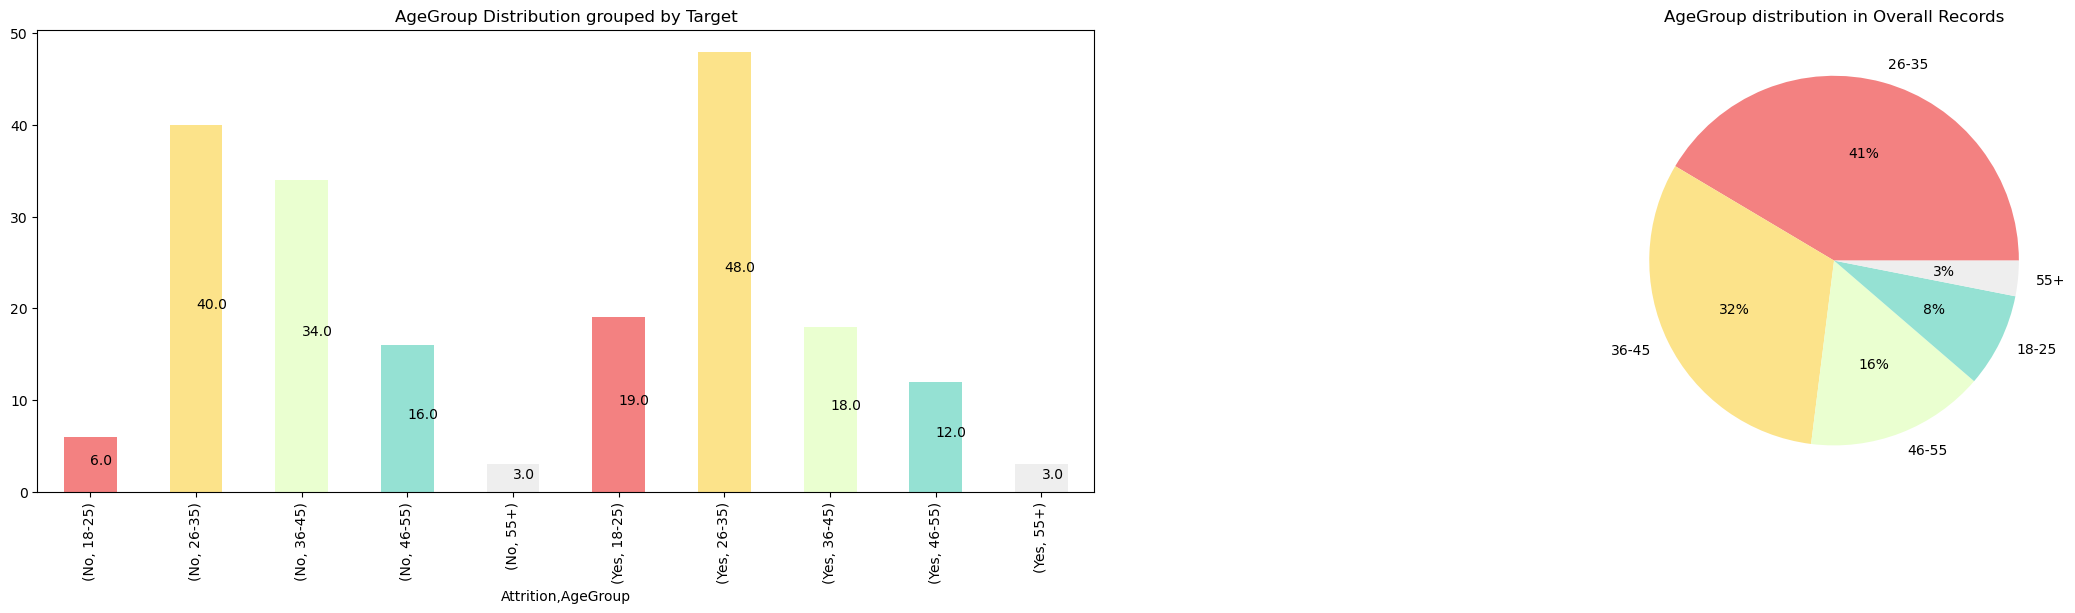

Table View
Attrition  AgeGroup
No         18-25        6.0
           26-35       40.0
           36-45       34.0
           46-55       16.0
           55+          3.0
Yes        18-25       19.0
           26-35       48.0
           36-45       18.0
           46-55       12.0
           55+          3.0
Name: proportion, dtype: float64



Distribution Based on Attrition
Description :  Age 



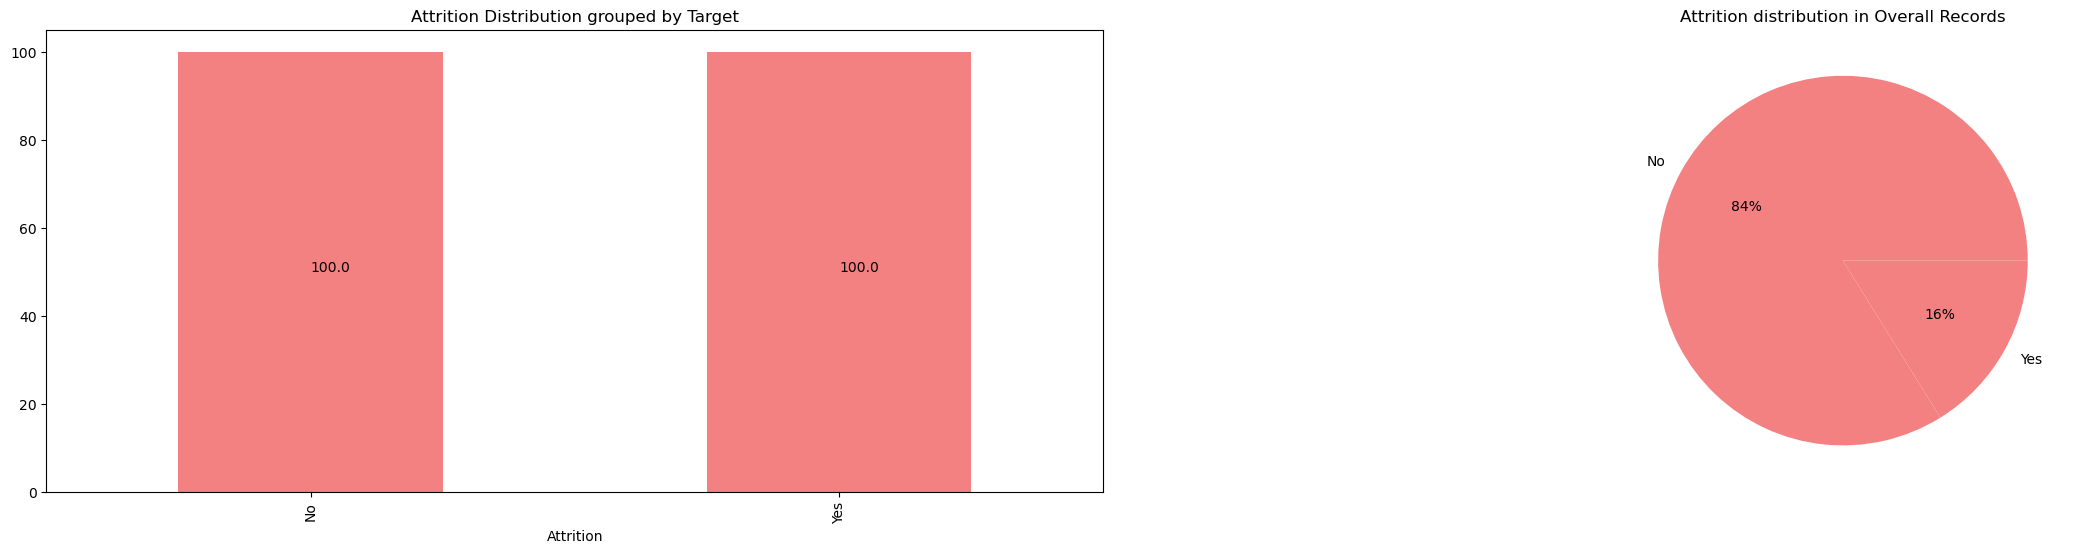

Table View
Attrition
No     100.0
Yes    100.0
Name: proportion, dtype: float64



Distribution Based on BusinessTravel
Description :  Age 



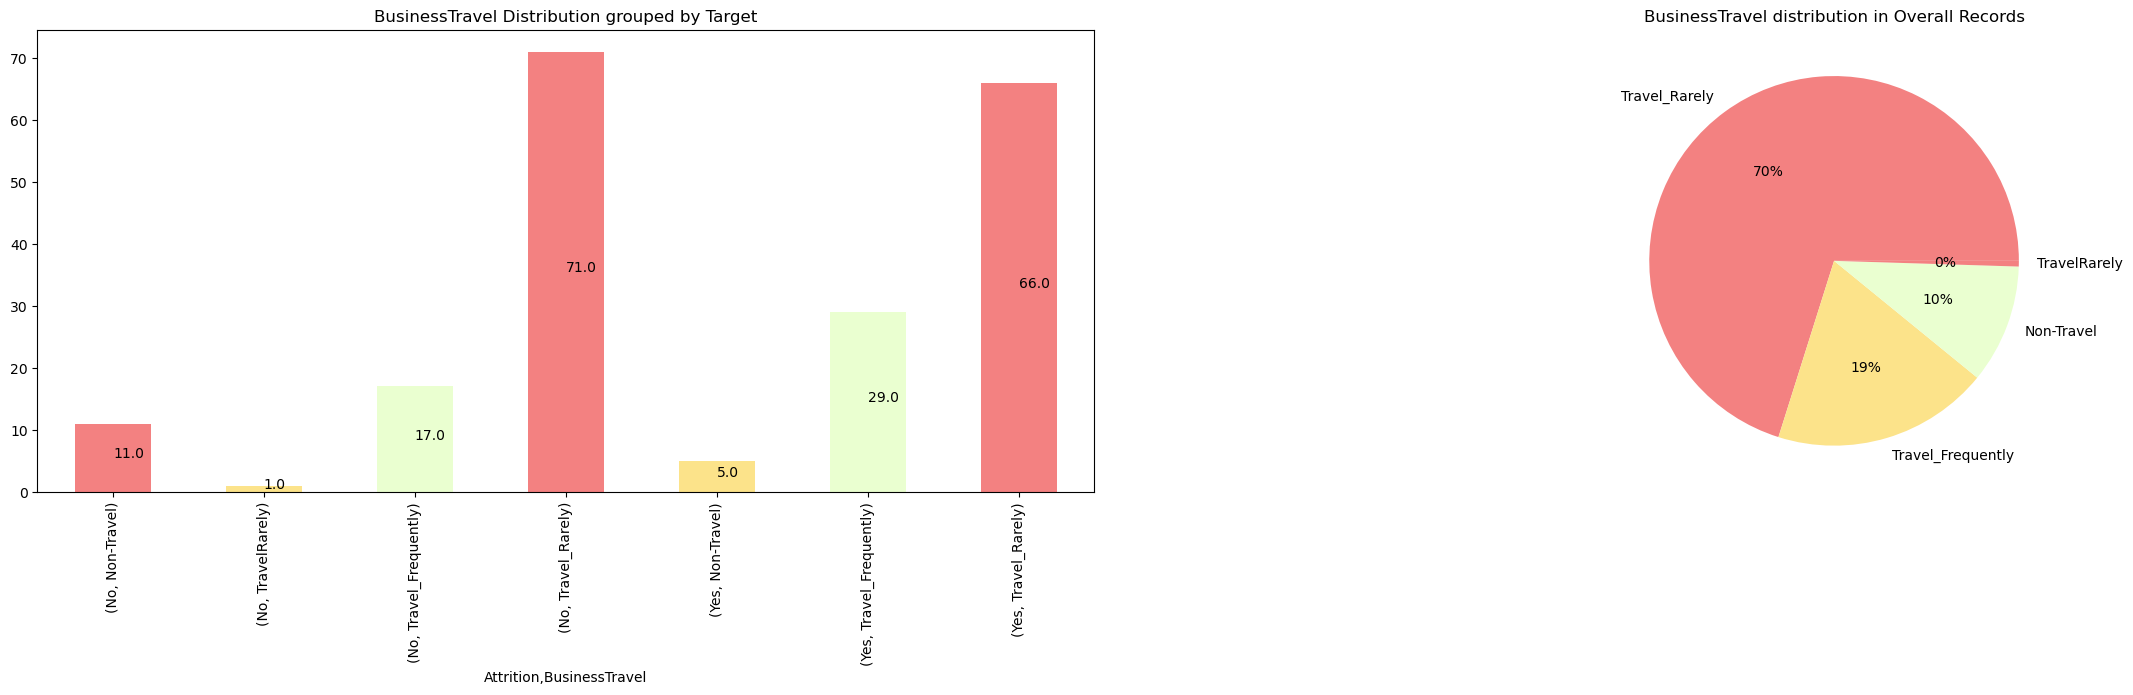

Table View
Attrition  BusinessTravel   
No         Non-Travel           11.0
           TravelRarely          1.0
           Travel_Frequently    17.0
           Travel_Rarely        71.0
Yes        Non-Travel            5.0
           Travel_Frequently    29.0
           Travel_Rarely        66.0
Name: proportion, dtype: float64



Distribution Based on Department
Description :  Age 



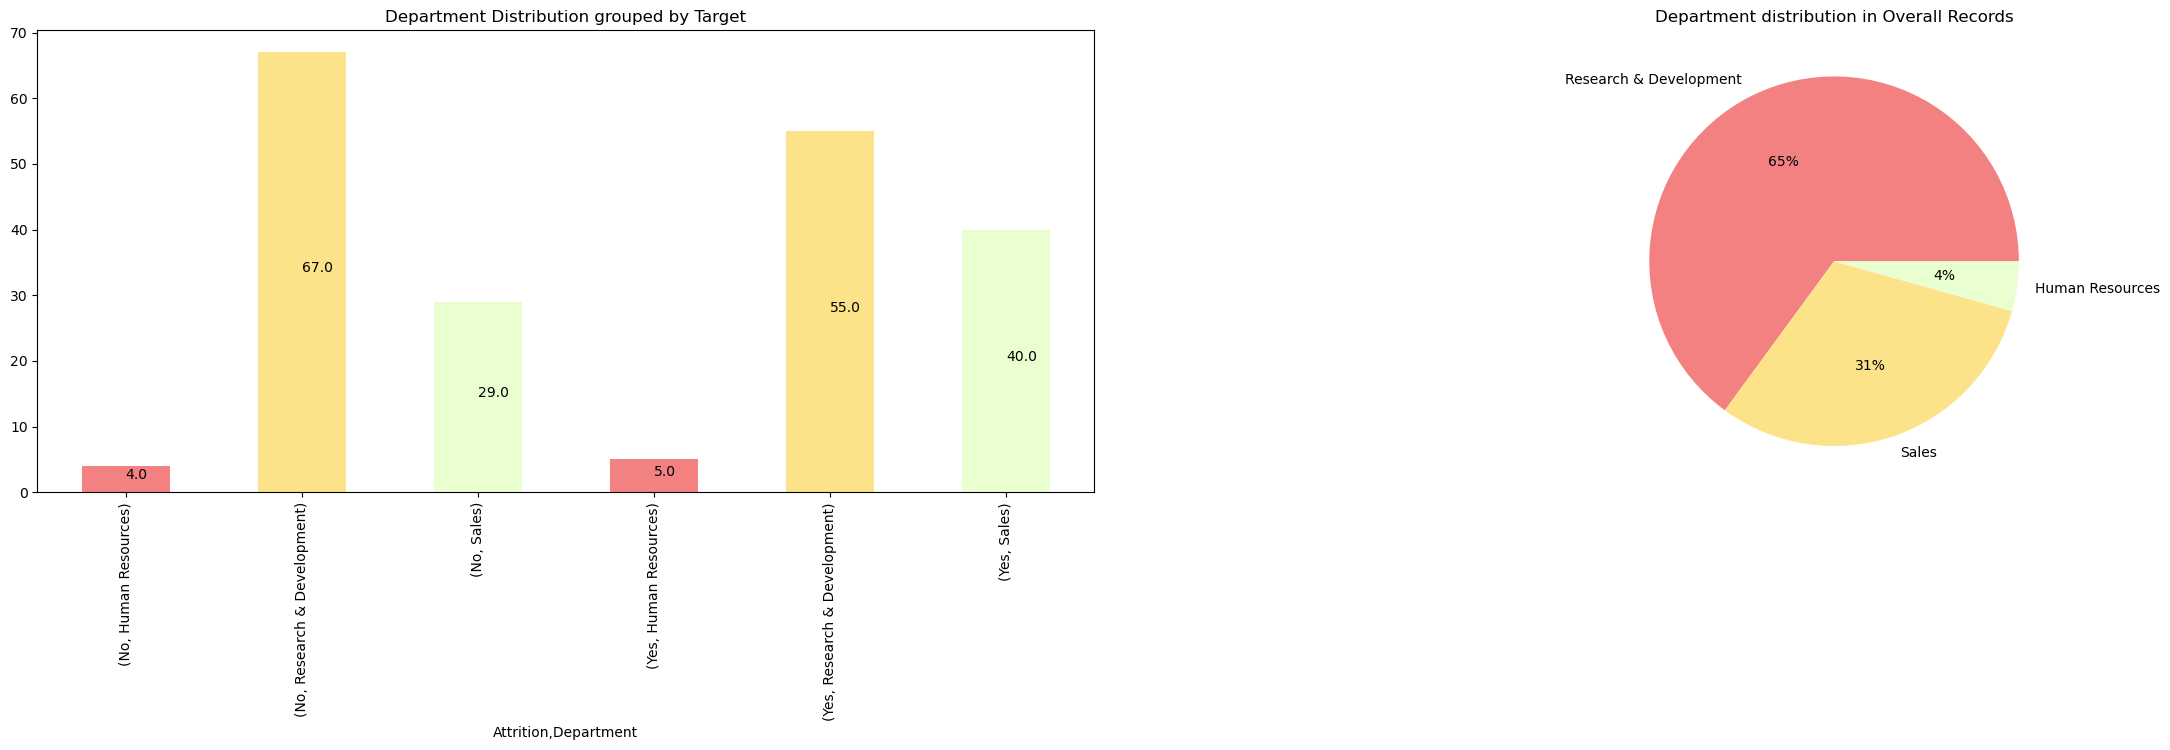

Table View
Attrition  Department            
No         Human Resources            4.0
           Research & Development    67.0
           Sales                     29.0
Yes        Human Resources            5.0
           Research & Development    55.0
           Sales                     40.0
Name: proportion, dtype: float64



Distribution Based on EducationField
Description :  Age 



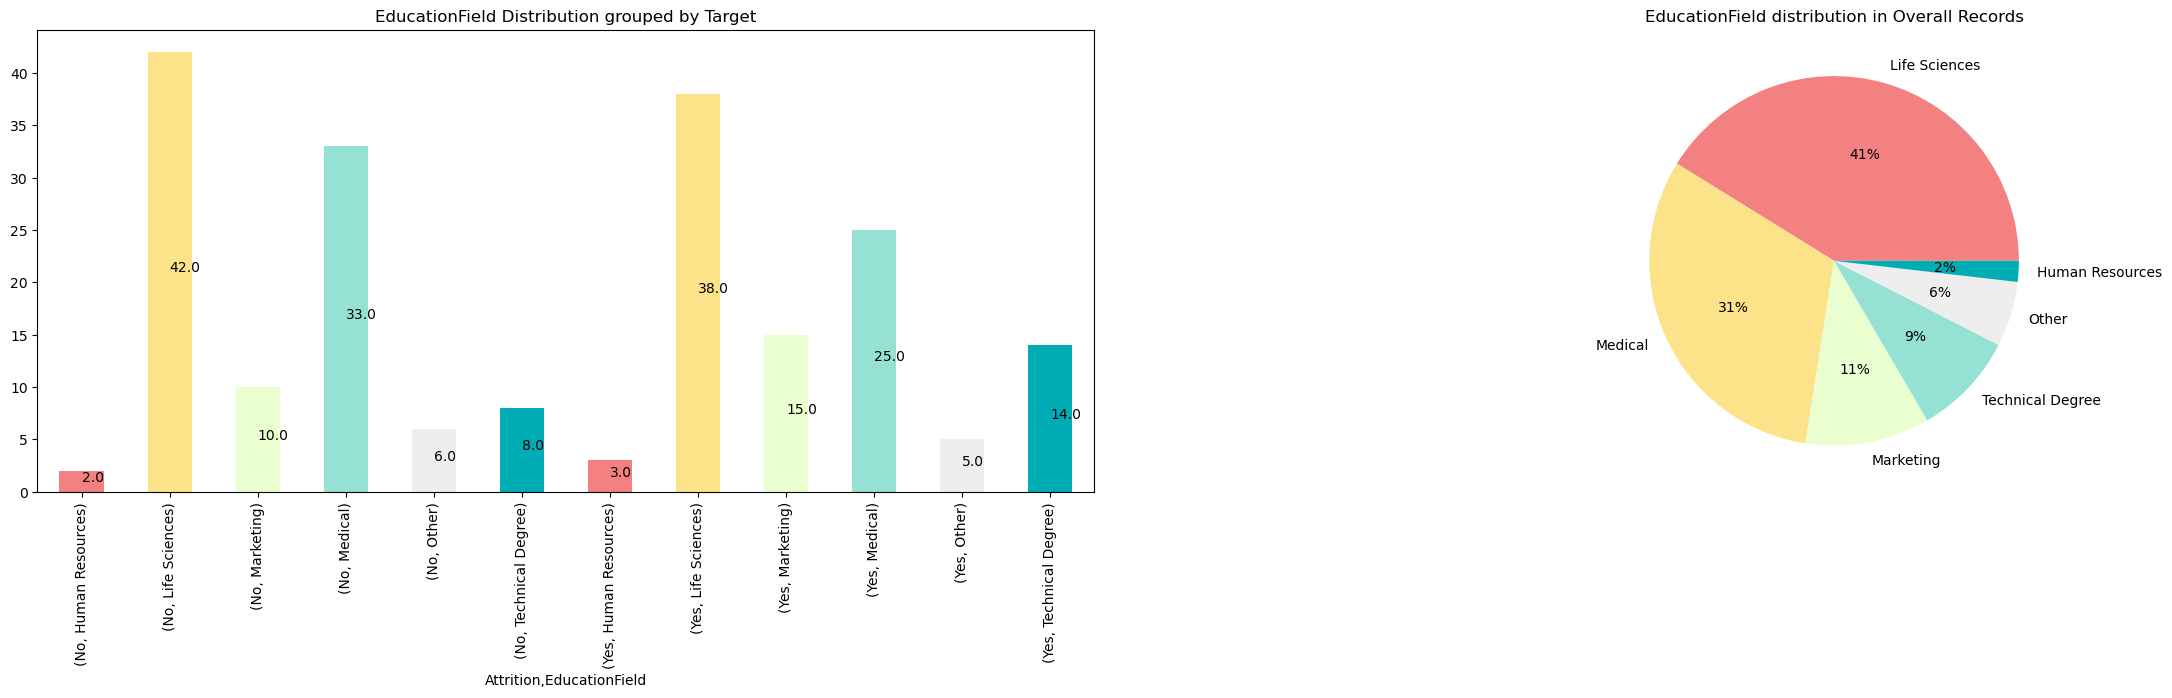

Table View
Attrition  EducationField  
No         Human Resources      2.0
           Life Sciences       42.0
           Marketing           10.0
           Medical             33.0
           Other                6.0
           Technical Degree     8.0
Yes        Human Resources      3.0
           Life Sciences       38.0
           Marketing           15.0
           Medical             25.0
           Other                5.0
           Technical Degree    14.0
Name: proportion, dtype: float64



Distribution Based on Gender
Description :  Age 



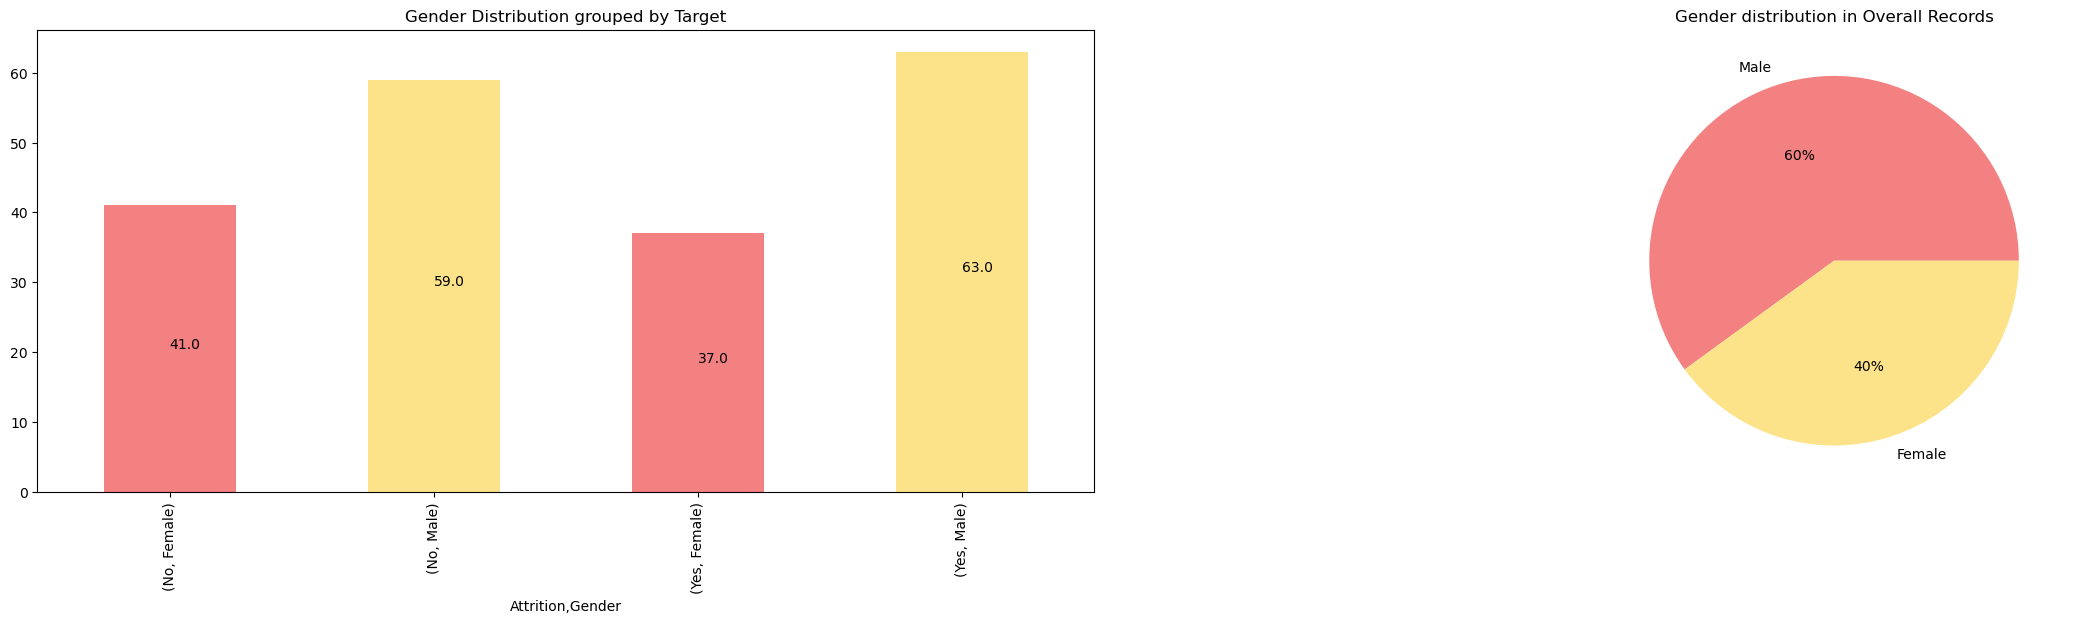

Table View
Attrition  Gender
No         Female    41.0
           Male      59.0
Yes        Female    37.0
           Male      63.0
Name: proportion, dtype: float64



Distribution Based on JobRole
Description :  Age 



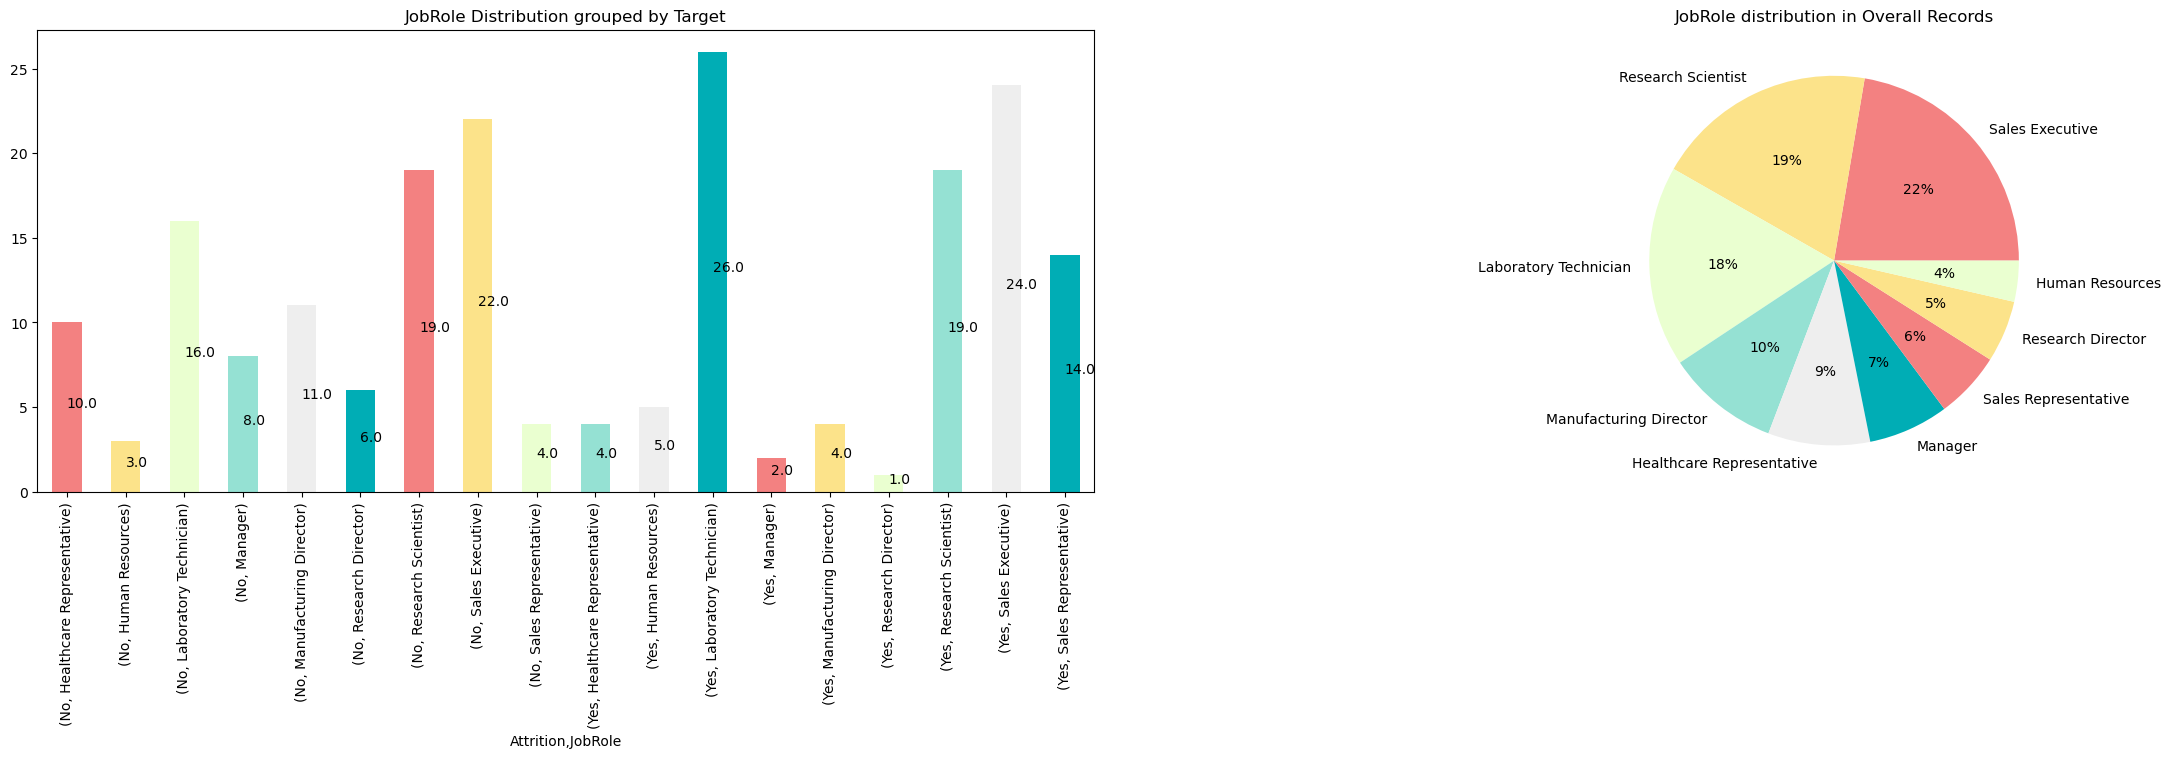

Table View
Attrition  JobRole                  
No         Healthcare Representative    10.0
           Human Resources               3.0
           Laboratory Technician        16.0
           Manager                       8.0
           Manufacturing Director       11.0
           Research Director             6.0
           Research Scientist           19.0
           Sales Executive              22.0
           Sales Representative          4.0
Yes        Healthcare Representative     4.0
           Human Resources               5.0
           Laboratory Technician        26.0
           Manager                       2.0
           Manufacturing Director        4.0
           Research Director             1.0
           Research Scientist           19.0
           Sales Executive              24.0
           Sales Representative         14.0
Name: proportion, dtype: float64



Distribution Based on MaritalStatus
Description :  Age 



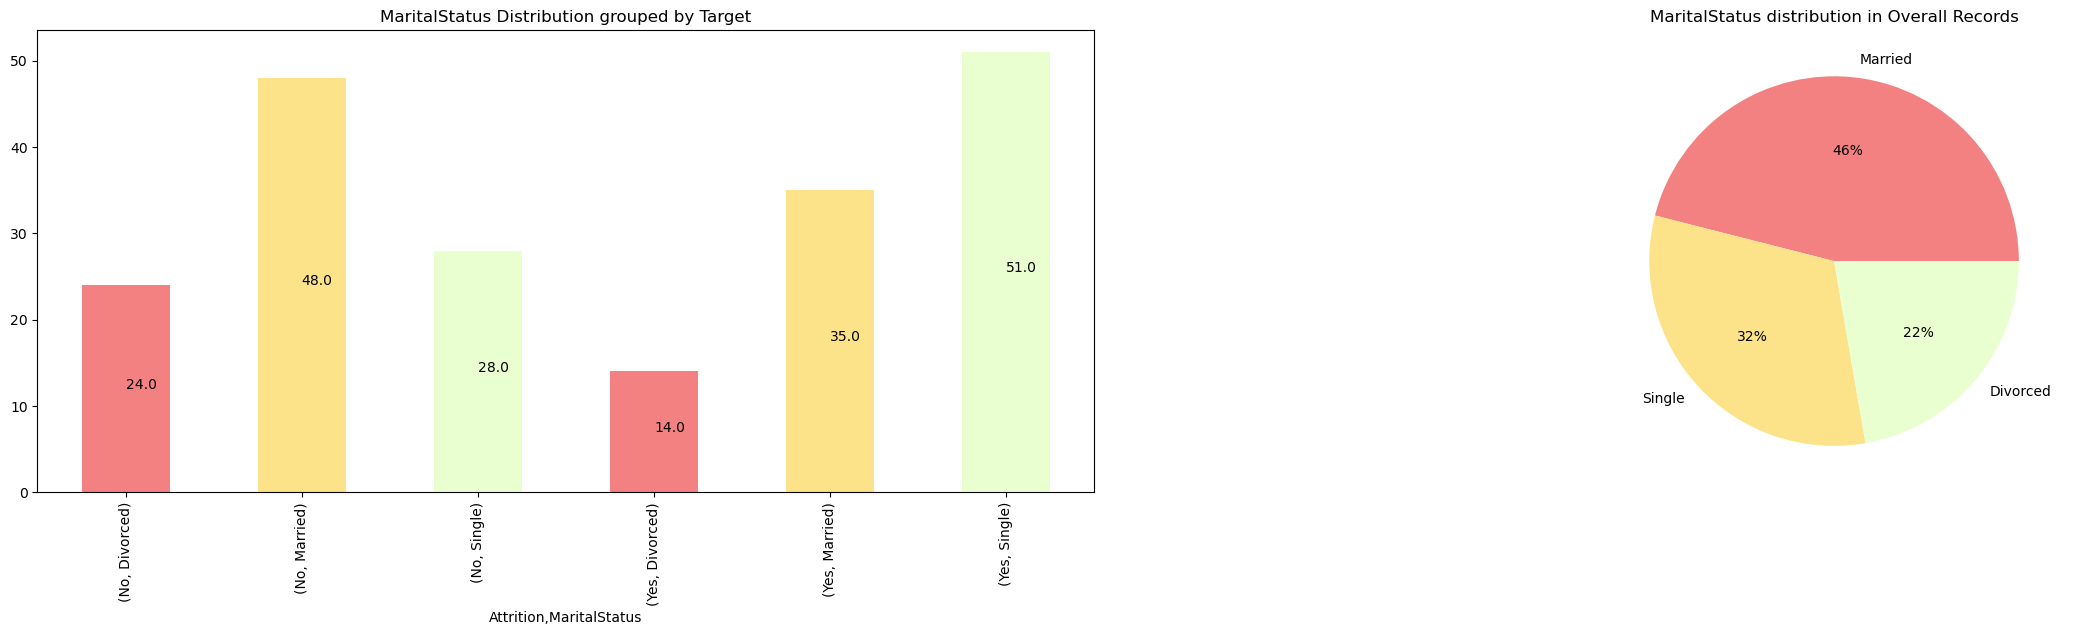

Table View
Attrition  MaritalStatus
No         Divorced         24.0
           Married          48.0
           Single           28.0
Yes        Divorced         14.0
           Married          35.0
           Single           51.0
Name: proportion, dtype: float64



Distribution Based on SalarySlab
Description :  Age 



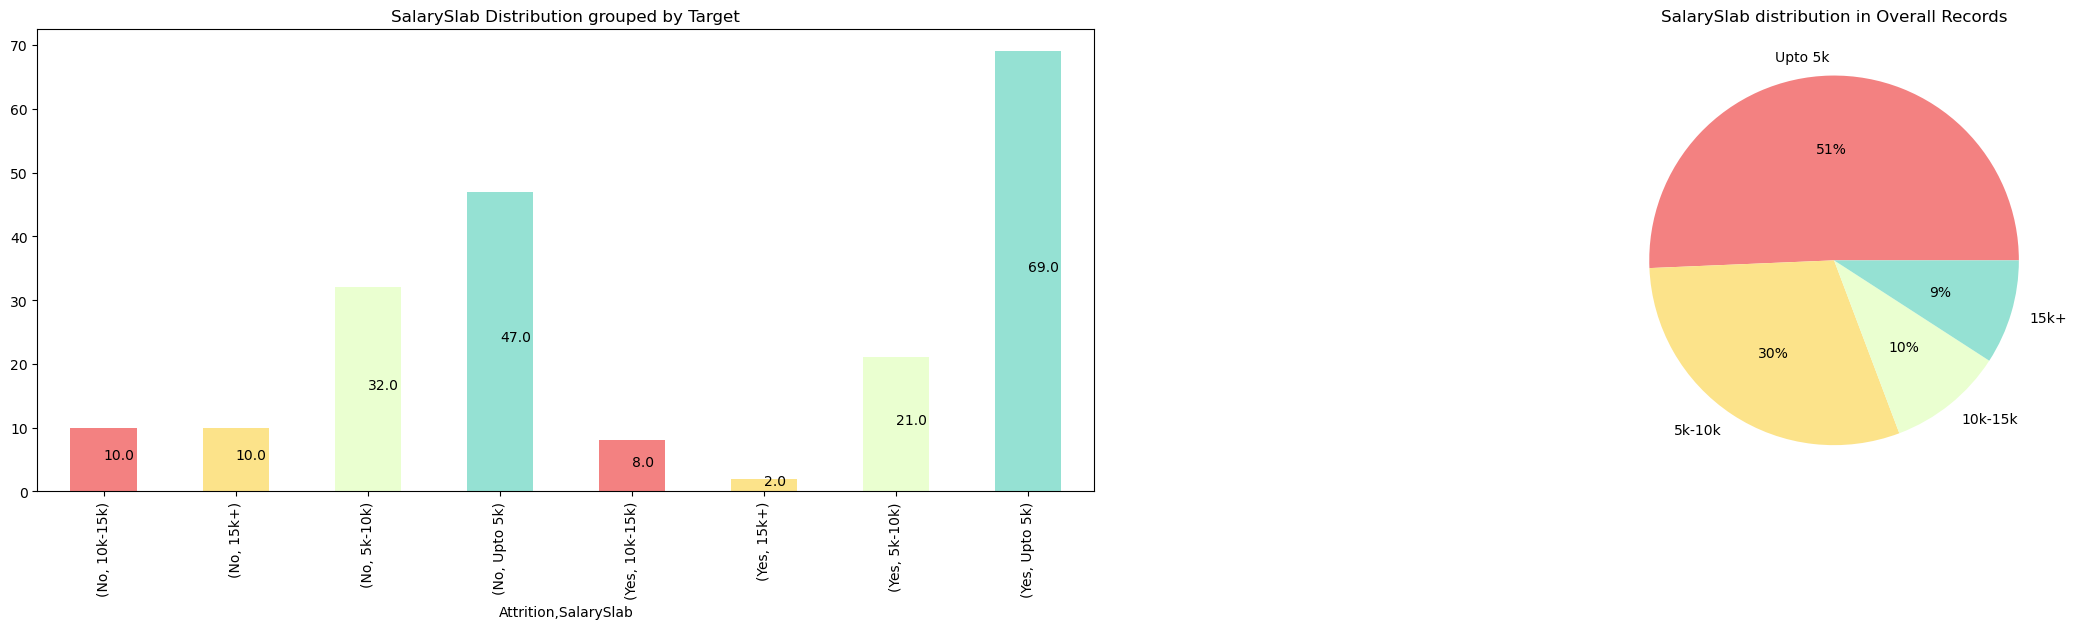

Table View
Attrition  SalarySlab
No         10k-15k       10.0
           15k+          10.0
           5k-10k        32.0
           Upto 5k       47.0
Yes        10k-15k        8.0
           15k+           2.0
           5k-10k        21.0
           Upto 5k       69.0
Name: proportion, dtype: float64





In [8]:
for feature in data_obj_cols[:-1]: #add column list numbers to control [1:2]
    distributionGraphs(feature)